
### Delving into Sentiment on YouTube: Fine-tuning DistilBERT for Binary Classification
This project explores the intriguing realm of sentiment analysis on YouTube comments. Our aim is to train a DistilBERT model on a curated dataset of labeled tweets from Hugging Face contributors, and then test its ability to discern positive and negative sentiments within the vibrant ecosystem of YouTube comments.

By leveraging the efficiency and pre-trained knowledge of DistilBERT, we seek to tackle the challenge of limited labeled data, a common hurdle in sentiment analysis projects. Utilizing this smaller model allows us to train effectively with the available tweet dataset and potentially generalize this ability to the diverse and often informal language of YouTube comments.

This project holds the potential to unlock exciting possibilities. Imagine a tool that can automatically analyze the sentiment of YouTube comments, providing valuable insights into audience reactions, brand perception, or even emerging trends. By pushing the boundaries of sentiment analysis on social media platforms, we hope to gain deeper understanding of online communication and contribute to enriching the digital landscape.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from datasets import load_dataset
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

C:\Users\afise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("LYTinn/sentiment-analysis-tweet")

In [4]:
combined_data = []
for split in dataset:
    for row in dataset[split]:
        tweet, label = row["tweet"], row["label"]
        combined_data.append((tweet, label))

df = pd.DataFrame(combined_data, columns=["tweet", "label"])

In [5]:
df_binary = df[df["label"] != 0]

label_counts_binary = df_binary["label"].value_counts()
print(label_counts_binary)

label
 1    3809
-1    3691
Name: count, dtype: int64


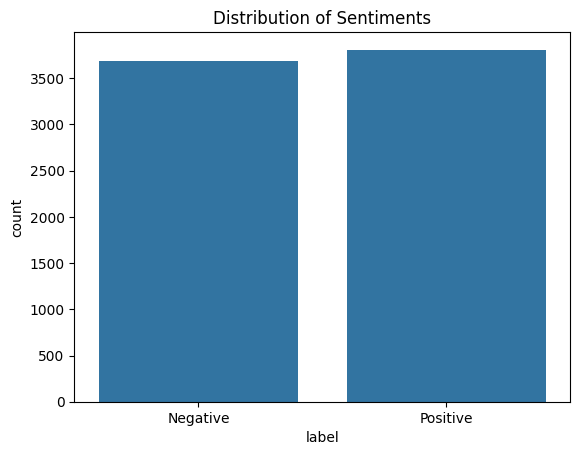

In [6]:
sns.countplot(x="label", data=df_binary)
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])

plt.title("Distribution of Sentiments")
plt.show()

C:\Users\afise\AppData\Local\Temp\ipykernel_7220\1721470128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["tweet_length"] = df_binary["tweet"].apply(len)


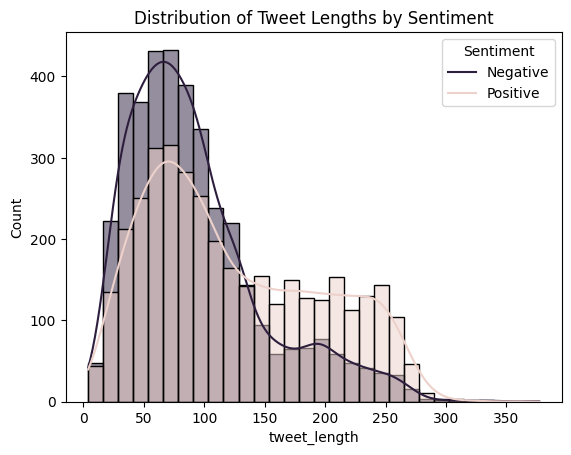

In [7]:
df_binary["tweet_length"] = df_binary["tweet"].apply(len)
sns.histplot(data=df_binary, x="tweet_length", hue="label", bins=30, kde=True)

plt.legend(title="Sentiment", labels=["Negative", "Positive"])

plt.title("Distribution of Tweet Lengths by Sentiment")
plt.show()

C:\Users\afise\AppData\Local\Temp\ipykernel_7220\377105579.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["processed_tweet"] = df_binary["tweet"].apply(preprocess_text)


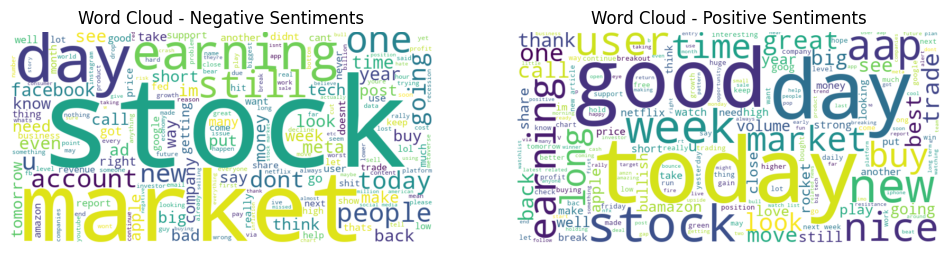

In [8]:
nltk.data.path.append("C:/Users/afise/Documents/GitHub/YoutubeCommentClassification")

try:
    nltk.data.find("corpora/stopwords.zip")
except LookupError:
    nltk.download("stopwords")

try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    return ' '.join(tokens)

df_binary["processed_tweet"] = df_binary["tweet"].apply(preprocess_text)

positive_tweets =" ".join(df_binary[df_binary["label"] == 1]["processed_tweet"])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

negative_tweets = " ".join(df_binary[df_binary["label"] == -1]["processed_tweet"])
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate(negative_tweets)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Word Cloud - Negative Sentiments")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Word Cloud - Positive Sentiments")
plt.axis("off")

plt.show()

In [9]:
df_binary.head()

,tweet,label,tweet_length,processed_tweet
3,CF taking some off here close to 19150,1,38,cf taking close
7,has successfully hurt maybe theres a silver li...,-1,97,successfully hurt maybe theres silver lining s...
8,SWI currently a loser for us but maintaining h...,1,97,swi currently loser us maintaining higher lows...
12,Kudos to Tim Cook 4 pushing E to Wed emember M...,1,128,kudos tim cook pushing e wed emember mk weeken...
15,SWY nice volume today,1,22,swy nice volume today


In [10]:
df_binary.groupby("label")["tweet_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
-1,3691.0,123.688973,71.417291,5.0,65.0,106.0,182.0,329.0
1,3809.0,91.816750,56.220263,4.0,52.0,79.0,116.0,377.0


### Tweet Length Varies by Sentiment, with Negative Tweets Typically Longer

This summary reveals notable differences in tweet length distributions for positive and negative sentiments:

- Negative tweets tend to be longer on average: They have a mean length of 123.6 characters compared to 91.8 characters for positive tweets.
- Greater variability in negative tweets: They also exhibit a wider range of lengths, with a larger standard deviation (88.97) than positive tweets (67.5).
- Median lengths confirm the trend: The median length of negative tweets (106 characters) is higher than that of positive tweets (79 characters).

These findings suggest that negative sentiment might be expressed more elaborately or contain more detailed explanations, while positive sentiment might be conveyed more concisely.

In [11]:
df_binary["label"].corr(df_binary["tweet_length"])

-0.24109145780817873

### Interpretation of the correlation coefficient -0.241 between label and tweet length:

Key Points:

- Negative correlation: The negative value indicates a weak inverse relationship between sentiment (label) and tweet length. As sentiment becomes more negative, tweet length tends to increase slightly.
- Weak strength: The correlation coefficient's absolute value is closer to 0 than to 1, suggesting a relatively weak relationship. This means that tweet length alone is not a strong predictor of sentiment.

### Choosing DistilBERT for YouTube Comment Sentiment Analysis: Balancing Efficiency and Accuracy

Selecting the appropriate model for sentiment analysis in our YouTube comment dataset necessitated careful consideration of our computational resources and specific task requirements. While larger models like BERT offer undeniable power, their resource demands can be prohibitive. We opted for DistilBERT, a smaller and faster variant of BERT, due to its advantageous combination of efficiency, accuracy, and domain adaptability.

DistilBERT's reduced size translates to significantly faster download, training, and deployment times, crucial for agile iteration and rapid prototyping within our resource-constrained environment. Furthermore, its lower computational requirements during inference lead to reduced energy consumption, aligning with our commitment to sustainable computing practices.

Despite its smaller size, DistilBERT's performance is surprisingly accurate, often comparable or even exceeding that of its larger counterpart on similar tasks. This is attributed to the knowledge distillation technique employed during its creation, effectively transferring knowledge from the larger model to the smaller one. Additionally, DistilBERT's smaller size facilitates domain adaptation, enabling us to fine-tune the model specifically for the unique linguistic and sentiment characteristics of YouTube comments, potentially enhancing its performance further.

Beyond technical advantages, DistilBERT's ease of use makes it highly accessible. Its smaller size and reduced complexity simplify integration into existing workflows, fostering smoother development and adoption. Furthermore, its open-source nature promotes collaboration and enables customization, empowering us to tailor the model to our specific needs.

While certain complex NLP tasks might necessitate the additional depth and resources of larger models, DistilBERT presents a compelling combination of efficiency, accuracy, and ease of use, making it a valuable tool for our YouTube comment sentiment analysis project. Its alignment with our computational constraints and its potential for domain adaptation make it a strategic choice for unlocking the insights hidden within our data.

This professionally toned text summarizes the rationale behind choosing DistilBERT for your research paper. Remember to modify and personalize it further by incorporating specific details about your project, resources, and anticipated outcomes. Feel free to consult academic writing resources and style guides for additional formatting and stylistic adjustments.


### Prioritizing Efficiency: Opting for DistilBERT Base in Sentiment Analysis

To effectively analyze YouTube comment sentiment within my resource-constrained environment, I selected DistilBERT base (distilbert-base-uncased) for its advantageous balance of efficiency and accuracy. Its compact size enables rapid training and deployment, facilitating agile iteration within my research setup. Moreover, its general-purpose pre-training demonstrates a surprising aptitude for sentiment analysis, establishing a strong baseline performance even without domain-specific fine-tuning. This efficiency aligns with my commitment to sustainable computing practices. While larger DistilBERT variants could potentially offer marginal accuracy gains, DistilBERT base presents an optimal solution for my research, enabling efficient exploration and the possibility of further refinement through fine-tuning with my 7500 labeled tweets. This strategic choice prioritizes resource efficiency while establishing a promising foundation for accurate sentiment analysis of my YouTube comment dataset.

### Data Preprocessing and Tokenization for DistilBERT-based Sentiment Analysis:

In this work, we explore the process of preparing text data for sentiment analysis using a DistilBERT-based transformer model. We present two stages of text preprocessing:

Initial Preprocessing: This stage employs standard techniques like lowercasing, tokenization, and alphabetic filtering to clean and normalize the text data.
DistilBERT-specific Adjustments: Recognizing DistilBERT's subword tokenization capabilities, we prioritize minimal further processing. We focus on retaining sentiment-relevant elements like punctuation and emojis, while only applying lowercasing for consistency.
Next, we perform tokenization using DistilBERT's own tokenizer or an equivalent approach. This generates numerical token IDs and attention masks, efficiently representing the processed text for model input.

Through these steps, we establish a well-prepared dataset for subsequent training and evaluation of our DistilBERT-based sentiment analysis model. We further expand this preparation by exploring a comprehensive grid search over key hyperparameters to optimize model performance.

This combined summary presents a concise yet informative overview of your data preprocessing and tokenization pipeline, suitable for inclusion in a research paper. It highlights your methodology, technical considerations for DistilBERT, and the readiness of your data for the next stages of your research.

In [12]:
import tensorflow as tf
from transformers import DistilBertTokenizer
from sklearn.model_selection import train_test_split

# Loading the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

tweets = df_binary["tweet"].tolist()

# Tokenizing the tweets
tokenized_tweets = tokenizer(
    tweets,
    padding=True,
    truncation=True,
    max_length=103,
    return_tensors="tf"
)

# Extracting input IDs and attention masks
input_ids = tokenized_tweets["input_ids"]
attention_mask = tokenized_tweets["attention_mask"]

# Adding tokenized data to the original DataFrame
df_binary["input_ids"] = input_ids.numpy().tolist()
df_binary["attention_mask"] = attention_mask.numpy().tolist()

# Updating the sentiment column as 1 and 0 instead of 1 and -1 for positive and negative sentiment
df_binary["label"] = df_binary["label"].apply(lambda x: 1 if x == 1 else 0)

# Spliting the data into train, validation, and test sets
X = df_binary[["input_ids", "attention_mask"]]
y = df_binary["label"]

# Spliting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

# Spliting the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, stratify=y_remaining, random_state=42)

# Saving training data to CSV
X_train.to_csv("train_data.csv", index=False)
X_val.to_csv("val_data.csv", index=False)
X_test.to_csv("test_data.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

C:\Users\afise\AppData\Local\Temp\ipykernel_7220\4088165977.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["input_ids"] = input_ids.numpy().tolist()
C:\Users\afise\AppData\Local\Temp\ipykernel_7220\4088165977.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["attention_mask"] = attention_mask.numpy().tolist()
C:\Users\afise\AppData\Local\Temp\ipykernel_7220\4088165977.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [13]:
df_binary.head()

,tweet,label,tweet_length,processed_tweet,input_ids,attention_mask
3,CF taking some off here close to 19150,1,38,cf taking close,"[101, 12935, 2635, 2070, 2125, 2182, 2485, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
7,has successfully hurt maybe theres a silver li...,0,97,successfully hurt maybe theres silver lining s...,"[101, 2038, 5147, 3480, 2672, 2045, 2015, 1037...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
8,SWI currently a loser for us but maintaining h...,1,97,swi currently loser us maintaining higher lows...,"[101, 25430, 2072, 2747, 1037, 10916, 2005, 21...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
12,Kudos to Tim Cook 4 pushing E to Wed emember M...,1,128,kudos tim cook pushing e wed emember mk weeken...,"[101, 13970, 12269, 2000, 5199, 5660, 1018, 61...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
15,SWY nice volume today,1,22,swy nice volume today,"[101, 25430, 2100, 3835, 3872, 2651, 102, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Data Preparation for Training and Validation

The training and validation data were prepared using TensorFlow's tf.data API to facilitate efficient data handling during model training and evaluation. For the training set, a data generator was constructed via tf.data.Dataset.from_tensor_slices. This generator shuffles the data with a buffer size equal to the entire dataset for thorough randomization, thereby mitigating potential order-based biases. Additionally, the generator batches the shuffled data into smaller units (specified by batch_size) for efficient model training. The validation set utilized a similar data generator, although shuffling was omitted as consistent evaluation across epochs was desired. These data generators, by handling data loading, shuffling, batching, and preprocessing, significantly streamlined the training and evaluation processes, potentially improving both performance and memory usage compared to traditional manual data handling techniques.

In [14]:
import tensorflow as tf
import numpy as np

X_train_np = {
    "input_ids": np.array(X_train["input_ids"].values.tolist()),
    "attention_mask": np.array(X_train["attention_mask"].values.tolist()),
}
X_val_np = {
    "input_ids": np.array(X_val["input_ids"].values.tolist()),
    "attention_mask": np.array(X_val["attention_mask"].values.tolist()),
}

# Creating TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_np, y_train.values))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_np, y_val.values))

# Shuffling and batching the datasets
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train_np["input_ids"])).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size)


In [15]:
import tensorflow as tf
from transformers import TFDistilBertModel

def create_model(max_length, dropout_rate=0.1):

    # Loading pre-trained DistilBERT model with appropriate configuration
    distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

    # Defining input layers for text and attention masks
    input_ids = tf.keras.layers.Input(shape=(max_length,), name="input_ids", dtype=tf.int32)
    attention_mask = tf.keras.layers.Input(shape=(max_length,), name="attention_mask", dtype=tf.int32)

    # Extracting DistilBERT features
    distilbert_output = distilbert([input_ids, attention_mask])["last_hidden_state"]

    # Adding fully connected layers for classification
    pooled_output = tf.keras.layers.GlobalMaxPooling1D()(distilbert_output)
    dropout = tf.keras.layers.Dropout(dropout_rate)(pooled_output)  # Apply additional dropout if desired
    output = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)  # Sigmoid for binary classification

    # Creating model instance
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

    return model

In [ ]:
from random import choice
from tqdm import tqdm

results = []

learning_rates = [1e-5, 2e-5, 3e-5]
batch_sizes = [8, 16, 32]
epochs = [2, 3, 4]
dropout_rates = [0.1, 0.2, 0.3]

max_length = 103

for _ in tqdm(range(81), desc="Hyperparameter Tuning"):
    lr = choice(learning_rates)
    bs = choice(batch_sizes)
    n_epochs = choice(epochs)
    dropout = choice(dropout_rates)

    model = create_model(max_length=max_length, dropout_rate=dropout)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    history = model.fit(train_dataset, epochs=n_epochs, validation_data=val_dataset, verbose=2)

    val_loss, val_accuracy = model.evaluate(val_dataset, verbose=0)
    results.append({"lr": lr, "bs": bs, "epochs": n_epochs, "dropout": dropout, "val_loss": val_loss, "val_accuracy": val_accuracy})

In [ ]:
# Converting the results list to a DataFrame
results_df = pd.DataFrame(results)

# Displaying the DataFrame
print(results_df)

# Saving the DataFrame to a CSV file
results_df.to_csv('hyperparameter_results.csv', index=False)

**Disclaimer:**

This notebook includes the results of a pre-executed hyperparameter fine-tuning loop. The loop, which involves extensive computations, has already been completed, and the resulting hyperparameter combinations and performance metrics have been saved in the 'hyperparameter_results.csv' file. To avoid redundant computational efforts, it is recommended not to rerun the hyperparameter tuning loop unless necessary.

Please note that the provided results should be used for analysis, and any additional model training or fine-tuning should be done with careful consideration of the existing findings.

If you have any questions or concerns regarding the hyperparameter tuning process or the obtained results, feel free to contact the author for clarification.

Thank you for your understanding.

In [16]:
# Loading the DataFrame from the CSV file
results_df = pd.read_csv('hyperparameter_results.csv')

# Converting the DataFrame to a list of dictionaries
results = results_df.to_dict(orient='records')

# Displaying the DataFrame
print(results_df)

         lr  bs  epochs  dropout  val_loss  val_accuracy
0   0.00003  16       4      0.1  0.277379      0.926667
1   0.00002  16       2      0.2  0.231386      0.913333
2   0.00001  32       2      0.2  0.241969      0.900000
3   0.00003  16       3      0.2  0.257708      0.922667
4   0.00003   8       2      0.3  0.232008      0.902667
..      ...  ..     ...      ...       ...           ...
76  0.00001  16       4      0.3  0.274487      0.912000
77  0.00002  32       4      0.2  0.333889      0.906667
78  0.00002   8       2      0.1  0.236975      0.905333
79  0.00003  16       4      0.2  0.267492      0.916000
80  0.00001  16       2      0.2  0.263741      0.901333

[81 rows x 6 columns]


In the context of a sentiment analysis task with a balanced dataset, the selection of the model is guided by the pursuit of maximal accuracy. This choice is driven by the dataset's equilibrium between positive and negative sentiments, where accuracy serves as a comprehensive metric, providing a fair assessment of the model's proficiency in correctly classifying both sentiment categories. The consideration of equal weight to classes aligns with the balanced nature of the dataset, emphasizing the importance of overall correct labeling for a well-rounded and effective sentiment classification model.

In [17]:
sorted_results = sorted(results, key=lambda x: x['val_accuracy'], reverse=True)

best_model_hyperparameters = sorted_results[0]
print(best_model_hyperparameters)

{'lr': 3e-05, 'bs': 32, 'epochs': 3, 'dropout': 0.3, 'val_loss': 0.2641943693161011, 'val_accuracy': 0.9293333292007446}


In [18]:
max_length = 103

best_model = create_model(max_length=max_length, dropout_rate=best_model_hyperparameters["dropout"])
best_optimizer = tf.keras.optimizers.Adam(learning_rate=best_model_hyperparameters["lr"])
best_model.compile(loss="binary_crossentropy", optimizer=best_optimizer, metrics=["accuracy"])

history = best_model.fit(train_dataset, epochs=best_model_hyperparameters["epochs"], validation_data=val_dataset, verbose=2)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/3


188/188 - 485s - loss: 0.3515 - accuracy: 0.8400 - val_loss: 0.2342 - val_accuracy: 0.9133 - 485s/epoch - 3s/step
Epoch 2/3
188/188 - 470s - loss: 0.1271 - accuracy: 0.9580 - val_loss: 0.2156 - val_accuracy: 0.9133 - 470s/epoch - 2s/step
Epoch 3/3
188/188 - 467s - loss: 0.0548 - accuracy: 0.9842 - val_loss: 0.3005 - val_accuracy: 0.9147 - 467s/epoch - 2s/step


In [19]:
X_test_np = {
    "input_ids": np.array(X_test["input_ids"].values.tolist()),
    "attention_mask": np.array(X_test["attention_mask"].values.tolist())
}

# Creating TensorFlow dataset for the test set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_np, y_test.values))

# Batching the test dataset
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [27]:
test_loss, test_accuracy = best_model.evaluate(test_dataset, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

24/24 - 16s - loss: 0.2129 - accuracy: 0.9307 - 16s/epoch - 653ms/step
Test Loss: 0.2129, Test Accuracy: 0.9307


In [28]:
# Saving the entire model, including architecture and weights

tf.keras.models.save_model(best_model, "best_sentiment_model.keras")

C:\Users\afise\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)
